<a href="https://colab.research.google.com/github/chingu-voyages/v51-tier3-team-39/blob/main/marlissa_chingu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title


In [1]:
import pandas as pd
from google.colab import drive
import random
from datetime import datetime
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# # File path for user_reviews
# file_path = '/content/drive/MyDrive/chingu/chingu_datasets/user_reviews.csv'

# # Define chunk size for reading in parts
# chunk_size = 100000  # Smaller chunk size for less memory usage
# target_sample_size = 1000000  # 1 million rows

# # Set random seed for reproducibility
# random_seed = 42

# # Initialize an empty dataframe for the sampled data
# sampled_reviews = pd.DataFrame()

# # Iterate through the dataset in chunks
# for chunk in pd.read_csv(file_path, chunksize=chunk_size):
#     # Sample a portion from each chunk, setting a random seed
#     sampled_chunk = chunk.sample(frac=min(1, (target_sample_size - len(sampled_reviews)) / len(chunk)), random_state=random_seed)

#     # Append the sampled chunk to the result dataframe
#     sampled_reviews = pd.concat([sampled_reviews, sampled_chunk], ignore_index=True)

#     # Stop when we've sampled enough rows
#     if len(sampled_reviews) >= target_sample_size:
#         break

# # Trim down to exactly 1 million rows
# sampled_reviews = sampled_reviews.iloc[:target_sample_size]

# # Save the sampled dataset
# sampled_reviews.to_csv('/content/drive/MyDrive/chingu/chingu_datasets/sampled_user_reviews_1m_optimized.csv', index=False)




In [4]:
def camel_to_snake_manual(name):
    result = [name[0].lower()]
    for char in name[1:]:
        if char.isupper():
            result.append('_')
            result.append(char.lower())
        else:
            result.append(char)
    return ''.join(result)

In [5]:
def standardize_score(score):
    try:
        if '/' in score:
            num, denom = map(float, re.findall(r"[\d.]+", score))
            return round((num / denom) * 10, 1)  # Convert to a scale of 10
        else:
            return np.nan  # Return NaN for non-standard entries
    except:
        return np.nan

def convert_fraction_to_10_scale(score):
    if isinstance(score, str) and '/' in score:
        try:
            num, denom = map(float, score.split('/'))
            if denom != 0:  # Check to avoid division by zero
                return round((num / denom) * 10, 1)  # Convert to a scale of 10
        except ValueError:
            return np.nan  # Handle any invalid cases
    return np.nan  # Return NaN for non-fraction values


In [6]:
critic_reviews = pd.read_csv('/content/drive/MyDrive/chingu/chingu_datasets/critic_reviews.csv')
movies = pd.read_csv('/content/drive/MyDrive/chingu/chingu_datasets/movies.csv')
sampled_user_reviews = pd.read_csv('/content/drive/MyDrive/chingu/chingu_datasets/sampled_user_reviews_1m_optimized.csv')

print('Critic Reviews shape:', critic_reviews.shape)
print('Movies shape:', movies.shape)
print('User Reviews shape:', sampled_user_reviews.shape)

<ipython-input-6-24b98a106077>:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  critic_reviews = pd.read_csv('/content/drive/MyDrive/chingu/chingu_datasets/critic_reviews.csv')


Critic Reviews shape: (967564, 16)
Movies shape: (10233, 13)
User Reviews shape: (1000000, 13)


# Datasets

## `critic_reviews`

#### Data Dictionary for `critic_reviews`

| Column Name       | Data Type | Description                                                                                         |
| ----------------- | --------- | --------------------------------------------------------------------------------------------------- |
| `reviewId`        | int64     | Unique identifier for each critic's review.                                                         |
| `movieId`         | object    | Unique identifier for each movie.                                                                   |
| `creationDate`    | object    | Date when the review was created.                                                                   |
| `criticName`      | object    | Name of the critic who wrote the review.                                                            |
| `criticPageUrl`   | object    | URL to the critic's profile or review page.                                                         |
| `reviewState`     | object    | Status of the review (e.g., "published", "draft").                                                  |
| `isFresh`         | bool      | Indicates whether the review is considered "fresh" (positive).                                      |
| `isRotten`        | bool      | Indicates whether the review is considered "rotten" (negative).                                     |
| `isRtUrl`         | object    | Indicates whether there is a URL link to the full review on Rotten Tomatoes                                  |
| `isTopCritic`     | bool      | Indicates whether the review is from a top critic.                                                  |
| `publicationUrl`  | object    | URL of the publication where the review was published.                                              |
| `publicationName` | object    | Name of the publication that published the review.                                                  |
| `reviewUrl`       | object    | URL link to the full review (if available).                                                         |
| `quote`           | object    | A short excerpt or quote from the review.                                                           |
| `scoreSentiment`  | object    | The sentiment of the review score (e.g., positive, negative).                              |
| `originalScore`   | object    | The original score given by the critic |

In [7]:
critic_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967564 entries, 0 to 967563
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   reviewId         967564 non-null  int64 
 1   movieId          967564 non-null  object
 2   creationDate     967564 non-null  object
 3   criticName       958112 non-null  object
 4   criticPageUrl    958112 non-null  object
 5   reviewState      967564 non-null  object
 6   isFresh          967564 non-null  bool  
 7   isRotten         967564 non-null  bool  
 8   isRtUrl          911079 non-null  object
 9   isTopCritic      967564 non-null  bool  
 10  publicationUrl   967564 non-null  object
 11  publicationName  967564 non-null  object
 12  reviewUrl        849906 non-null  object
 13  quote            934601 non-null  object
 14  scoreSentiment   967564 non-null  object
 15  originalScore    693527 non-null  object
dtypes: bool(3), int64(1), object(12)
memory usage: 98.7+ MB


In [8]:
critic_reviews.head()

,reviewId,movieId,creationDate,criticName,criticPageUrl,reviewState,isFresh,isRotten,isRtUrl,isTopCritic,publicationUrl,publicationName,reviewUrl,quote,scoreSentiment,originalScore
0,1913967,16db6b7e-176a-3a45-a31f-158a09f94630,1800-01-01,Jonathan Rosenbaum,/critics/jonathan-rosenbaum,fresh,True,False,False,True,/critics/source/66,Chicago Reader,http://www.chicagoreader.com/chicago/the-adven...,Terry Gilliam's third fantasy feature may not ...,POSITIVE,NaN
1,1906428,29998351-00a7-31ca-b616-6436ffe438e5,1800-01-01,Jennie Kermode,/critics/jennie-kermode,fresh,True,False,False,False,/critics/source/1869,Eye for Film,http://www.eyeforfilm.co.uk/reviews.php?id=7968,NaN,POSITIVE,3.5/5
2,1902262,34bf7e79-d110-3b33-93f5-d1e3b79aea10,1800-01-01,Owen Gleiberman,/critics/owen-gleiberman,fresh,True,False,False,True,/critics/source/150,Entertainment Weekly,https://ew.com/article/1993/10/15/movie-review...,"Weir, working from a script by Rafael Yglesias...",POSITIVE,B
3,1897051,3aeb7064-f73d-32c1-8432-94babc14e6f1,1800-01-01,Owen Gleiberman,/critics/owen-gleiberman,fresh,True,False,False,True,/critics/source/150,Entertainment Weekly,"http://www.ew.com/ew/article/0,,309271,00.html","Coming out from behind Spike Lee's camera, Ern...",POSITIVE,B+
4,1909547,3bd845e8-2e38-3504-9682-45bede2bb83c,1800-01-01,NaN,NaN,rotten,False,True,False,True,/critics/source/150,Entertainment Weekly,"http://www.ew.com/ew/article/0,,318442,00.html",NaN,NEGATIVE,D+


In [9]:
critic_reviews_cleaned = critic_reviews
critic_reviews_cleaned.columns = [camel_to_snake_manual(col) for col in critic_reviews_cleaned.columns]
critic_reviews_cleaned.columns

Index(['review_id', 'movie_id', 'creation_date', 'critic_name',
       'critic_page_url', 'review_state', 'is_fresh', 'is_rotten', 'is_rt_url',
       'is_top_critic', 'publication_url', 'publication_name', 'review_url',
       'quote', 'score_sentiment', 'original_score'],
      dtype='object')

In [10]:
critic_columns_to_remove = ['critic_page_url', 'review_state', 'is_rotten', 'is_rt_url', 'publication_url', 'review_url']
critic_reviews_cleaned = critic_reviews.drop(columns=critic_columns_to_remove)

In [11]:
# Convert creation_date to datetime
critic_reviews_cleaned['creation_date'] = pd.to_datetime(critic_reviews['creation_date'], errors='coerce')

In [12]:
critic_reviews_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967564 entries, 0 to 967563
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   review_id         967564 non-null  int64         
 1   movie_id          967564 non-null  object        
 2   creation_date     967564 non-null  datetime64[ns]
 3   critic_name       958112 non-null  object        
 4   is_fresh          967564 non-null  bool          
 5   is_top_critic     967564 non-null  bool          
 6   publication_name  967564 non-null  object        
 7   quote             934601 non-null  object        
 8   score_sentiment   967564 non-null  object        
 9   original_score    693527 non-null  object        
dtypes: bool(2), datetime64[ns](1), int64(1), object(6)
memory usage: 60.9+ MB


In [13]:
grade_mapping = {
    'A+': 10.0, 'A': 9.5, 'A-': 9.0,
    'B+': 8.5, 'B': 8.0, 'B-': 7.5,
    'C+': 7.0, 'C': 6.5, 'C-': 6.0,
    'D+': 5.5, 'D': 5.0, 'D-': 4.5,
    'F': 2.5
}


critic_reviews_cleaned['standardized_score'] = critic_reviews_cleaned['original_score'].apply(convert_fraction_to_10_scale)

# Use fillna to apply letter grade mapping
critic_reviews_cleaned['standardized_score'] = critic_reviews_cleaned['standardized_score'].fillna(
    critic_reviews_cleaned['original_score'].replace(grade_mapping)
)
print(critic_reviews_cleaned[['original_score', 'standardized_score']].head())

  original_score standardized_score
0            NaN                NaN
1          3.5/5                7.0
2              B                8.0
3             B+                8.5
4             D+                5.5


In [14]:
# Convert non-numeric 'standardized_score' values to NaN
critic_reviews_cleaned['standardized_score'] = pd.to_numeric(critic_reviews_cleaned['standardized_score'], errors='coerce')

print(critic_reviews_cleaned['standardized_score'].value_counts())

standardized_score
8.000000      107491
6.000000       91268
7.500000       70089
5.000000       65641
7.000000       52592
               ...  
12.000000          1
6.880000           1
8.474858           1
6.783300           1
435.000000         1
Name: count, Length: 168, dtype: int64


In [15]:
# Clip values to stay within the 0 to 10 range
critic_reviews_cleaned['standardized_score'] = critic_reviews_cleaned['standardized_score'].fillna(0).clip(lower=0, upper=10).round(0).astype(int)

print(critic_reviews_cleaned['standardized_score'].value_counts())

standardized_score
0     280016
8     198068
6     143651
4      69461
5      66202
9      60565
7      54208
10     52901
2      28950
3       9926
1       3616
Name: count, dtype: int64


In [16]:
# Remove rows where standardized_score is 0
critic_reviews_cleaned = critic_reviews_cleaned[critic_reviews_cleaned['standardized_score'] != 0]

print(critic_reviews_cleaned['standardized_score'].value_counts())


standardized_score
8     198068
6     143651
4      69461
5      66202
9      60565
7      54208
10     52901
2      28950
3       9926
1       3616
Name: count, dtype: int64


In [17]:
critic_reviews_cleaned = critic_reviews_cleaned.drop(columns=['original_score'])

In [18]:
critic_reviews_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 687548 entries, 1 to 967561
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   review_id           687548 non-null  int64         
 1   movie_id            687548 non-null  object        
 2   creation_date       687548 non-null  datetime64[ns]
 3   critic_name         680378 non-null  object        
 4   is_fresh            687548 non-null  bool          
 5   is_top_critic       687548 non-null  bool          
 6   publication_name    687548 non-null  object        
 7   quote               655188 non-null  object        
 8   score_sentiment     687548 non-null  object        
 9   standardized_score  687548 non-null  int64         
dtypes: bool(2), datetime64[ns](1), int64(2), object(5)
memory usage: 48.5+ MB


In [19]:
# Fill missing critic names with 'Unknown Critic'
critic_reviews_cleaned['critic_name'] = critic_reviews_cleaned['critic_name'].fillna('Unknown Critic')

# Drop rows where 'quote' is missing
critic_reviews_cleaned = critic_reviews_cleaned.dropna(subset=['quote'])

# Extract year from 'creation_date' and ensure only reasonable years are kept
critic_reviews_cleaned['creation_year'] = critic_reviews_cleaned['creation_date'].dt.year

# Filter rows to keep only those with years from 1900 onwards
critic_reviews_cleaned.loc[:, 'creation_year'] = critic_reviews_cleaned['creation_date'].dt.year

critic_reviews_cleaned.info(), critic_reviews_cleaned['creation_year'].value_counts()


<ipython-input-19-e9c58b6db532>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  critic_reviews_cleaned['creation_year'] = critic_reviews_cleaned['creation_date'].dt.year


<class 'pandas.core.frame.DataFrame'>
Index: 655188 entries, 2 to 967561
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   review_id           655188 non-null  int64         
 1   movie_id            655188 non-null  object        
 2   creation_date       655188 non-null  datetime64[ns]
 3   critic_name         655188 non-null  object        
 4   is_fresh            655188 non-null  bool          
 5   is_top_critic       655188 non-null  bool          
 6   publication_name    655188 non-null  object        
 7   quote               655188 non-null  object        
 8   score_sentiment     655188 non-null  object        
 9   standardized_score  655188 non-null  int64         
 10  creation_year       655188 non-null  int32         
dtypes: bool(2), datetime64[ns](1), int32(1), int64(2), object(5)
memory usage: 48.7+ MB


(None,
 creation_year
 2019    45448
 2018    39001
 2021    37092
 2022    36787
 2023    36303
         ...  
 1971        1
 1970        1
 1967        1
 1959        1
 1946        1
 Name: count, Length: 80, dtype: int64)

In [20]:
critic_reviews_cleaned = critic_reviews_cleaned.drop(columns=['creation_date'])

In [21]:
critic_reviews_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 655188 entries, 2 to 967561
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   review_id           655188 non-null  int64 
 1   movie_id            655188 non-null  object
 2   critic_name         655188 non-null  object
 3   is_fresh            655188 non-null  bool  
 4   is_top_critic       655188 non-null  bool  
 5   publication_name    655188 non-null  object
 6   quote               655188 non-null  object
 7   score_sentiment     655188 non-null  object
 8   standardized_score  655188 non-null  int64 
 9   creation_year       655188 non-null  int32 
dtypes: bool(2), int32(1), int64(2), object(5)
memory usage: 43.7+ MB


In [22]:
# Remove rows with duplicate review_ids, keeping the first occurrence
critic_reviews_cleaned = critic_reviews_cleaned.drop_duplicates(subset=['review_id'], keep='first')

# Verify the result by checking if any duplicates remain
print(critic_reviews_cleaned['review_id'].duplicated().sum())  # Should return 0 if duplicates are removed

0


In [23]:
# List of placeholder quotes to remove
placeholders = ["full review at Movies for the Masses", "full review in Greek", ".",
                "click for full review", "Click to read review", "click to read full review",
                "See website for more details.", "click to read the full review", "(No quote available.)"]

# Remove rows where the quote is a placeholder
critic_reviews_cleaned = critic_reviews_cleaned[~critic_reviews_cleaned['quote'].isin(placeholders)]

# Remove very short quotes (e.g., fewer than 5 characters)
critic_reviews_cleaned = critic_reviews_cleaned[critic_reviews_cleaned['quote'].str.len() > 5]

print(critic_reviews_cleaned['quote'].value_counts())


quote
One of the best films of the year.                                                                                                                                                                                                          15
A masterpiece.                                                                                                                                                                                                                              13
Disappointing.                                                                                                                                                                                                                              11
podcast review                                                                                                                                                                                                                              11
One of the year's best films.         

In [24]:
# Save a cleaned version of critic_reviews
critic_reviews_cleaned.to_csv('/content/drive/MyDrive/chingu/chingu_datasets/critic_reviews_cleaned.csv', index=False)

### Critic Reviews Analysis

## `movies`

#### Data Dictionary for `movies`

| Column Name               | Data Type | Description                                                                                           |
| ------------------------- | --------- | ----------------------------------------------------------------------------------------------------- |
| `movieId`                 | object    | Unique identifier for each movie.                                                                     |
| `movieYear`               | int64     | The year the movie was released.                                                                      |
| `movieURL`                | object    | URL to the movie's page on Rotten Tomatoes.                                                           |
| `movieTitle`              | object    | The title of the movie.                                                                               |
| `critic_score`            | float64   | Average score given by critics for the movie.                                                         |
| `critic_sentiment`        | object    | Sentiment of the critic's reviews (e.g., positive, negative, neutral).                                 |
| `audience_score`          | float64   | Average score given by audience members for the movie.                                                |
| `audience_sentiment`      | object    | Sentiment of audience reviews (e.g., positive, negative, neutral).                                     |
| `release_date_theaters`   | object    | The release date of the movie in theaters.                                                            |
| `release_date_streaming`  | object    | The release date of the movie on streaming platforms.                                                 |
| `rating`                  | object    | The movie's rating (e.g., PG, PG-13, R).                                                              |
| `original_language`       | object    | The original language of the movie (e.g., English, French).                                           |
| `runtime`                 | object    | The runtime of the movie in minutes (may be stored as text in some cases, e.g., "120 minutes").       |

In [25]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10233 entries, 0 to 10232
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   movieId                 10233 non-null  object 
 1   movieYear               10233 non-null  int64  
 2   movieURL                10233 non-null  object 
 3   movieTitle              10233 non-null  object 
 4   critic_score            9738 non-null   float64
 5   critic_sentiment        9738 non-null   object 
 6   audience_score          10144 non-null  float64
 7   audience_sentiment      10144 non-null  object 
 8   release_date_theaters   7928 non-null   object 
 9   release_date_streaming  10233 non-null  object 
 10  rating                  7758 non-null   object 
 11  original_language       10214 non-null  object 
 12  runtime                 10216 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.0+ MB


In [26]:
movies.head()

,movieId,movieYear,movieURL,movieTitle,critic_score,critic_sentiment,audience_score,audience_sentiment,release_date_theaters,release_date_streaming,rating,original_language,runtime
0,281004c8-bbc3-3522-8246-26ee44469bb4,1902,https://www.rottentomatoes.com/m/le_voyage_dan...,A Trip to the Moon,100.0,positive,90.0,positive,"Oct 4, 1902, Original","Aug 27, 2016",NaN,French (France),14m
1,ac173b27-b71a-34b3-9888-5304a0e165e0,1915,https://www.rottentomatoes.com/m/birth_of_a_na...,The Birth of a Nation,91.0,positive,47.0,negative,"Mar 3, 1915, Wide","Jul 8, 2016",NaN,NaN,3h 10m
2,96f91c04-5e32-39b2-805f-4c1d1bcb3b1b,1921,https://www.rottentomatoes.com/m/the_cabinet_o...,The Cabinet of Dr. Caligari,96.0,positive,89.0,positive,"Mar 19, 1921, Wide","Mar 22, 2016",NaN,German,1h 9m
3,b70c2dc6-41e7-3240-a38f-5f5e5018eeb1,1921,https://www.rottentomatoes.com/m/1052609-kid,The Kid,100.0,positive,95.0,positive,"Jan 21, 1921, Original","Sep 2, 2016",NaN,English,1h 0m
4,13101368-55d8-30a1-9d41-4271211defbb,1922,https://www.rottentomatoes.com/m/nosferatu,Nosferatu,97.0,positive,87.0,positive,"Mar 5, 1922, Original","Jul 15, 2008",NaN,German,1h 5m


In [27]:
movies_cleaned = movies
movies_cleaned = movies_cleaned.drop(columns='movieURL')
movies_cleaned.columns = [camel_to_snake_manual(col) for col in movies_cleaned.columns]
print(movies_cleaned.columns)

Index(['movie_id', 'movie_year', 'movie_title', 'critic_score',
       'critic_sentiment', 'audience_score', 'audience_sentiment',
       'release_date_theaters', 'release_date_streaming', 'rating',
       'original_language', 'runtime'],
      dtype='object')


In [28]:
# Fill missing critic_score and audience_score with mean
movies_cleaned['critic_score'].fillna(movies_cleaned['critic_score'].mean(), inplace=True)
movies_cleaned['audience_score'].fillna(movies_cleaned['audience_score'].mean(), inplace=True)

# Fill missing critic_sentiment and audience_sentiment with 'unknown'
movies_cleaned['critic_sentiment'].fillna('unknown', inplace=True)
movies_cleaned['audience_sentiment'].fillna('unknown', inplace=True)

#  Fill missing rating with 'unknown'
movies_cleaned['rating'].fillna('unknown', inplace=True)

In [29]:
# Extract the year from 'release_date_theaters'
movies_cleaned['release_year_theaters'] = movies_cleaned['release_date_theaters'].str.extract(r'(\d{4})')

# Convert the extracted year to numeric
movies_cleaned['release_year_theaters'] = pd.to_numeric(movies_cleaned['release_year_theaters'], errors='coerce')

# Convert 'release_year_theaters' to integer
movies_cleaned['release_year_theaters'] = movies_cleaned['release_year_theaters'].astype('Int64')

movies_cleaned = movies_cleaned.drop(columns='release_date_theaters')
print(movies_cleaned['release_year_theaters'].head())

0    1902
1    1915
2    1921
3    1921
4    1922
Name: release_year_theaters, dtype: Int64


In [30]:
# Extract the year from 'release_date_streaming'
movies_cleaned['release_year_streaming'] = pd.to_datetime(movies_cleaned['release_date_streaming'], errors='coerce').dt.year
movies_cleaned = movies_cleaned.drop(columns='release_date_streaming')


In [31]:
# Round the critic scores to the nearest integer
movies_cleaned['critic_score'] = movies_cleaned['critic_score'].round(0).astype('Int64')

print(movies_cleaned['critic_score'].value_counts())

critic_score
64     588
100    448
91     213
92     208
90     207
      ... 
6       22
5       20
3       11
2        6
1        4
Name: count, Length: 101, dtype: Int64


In [32]:
# Impute sentiment based on critic score
movies_cleaned.loc[(movies_cleaned['critic_sentiment'] == 'unknown') & (movies_cleaned['critic_score'] >= 70), 'critic_sentiment'] = 'positive'
movies_cleaned.loc[(movies_cleaned['critic_sentiment'] == 'unknown') & (movies_cleaned['critic_score'] < 70), 'critic_sentiment'] = 'negative'
movies_cleaned['critic_sentiment'].value_counts()

,count
critic_sentiment,
positive,5925
negative,4308


In [33]:
# Impute audience scores based on sentiment
movies_cleaned.loc[(movies_cleaned['audience_sentiment'] == 'positive') & (movies_cleaned['audience_score'].isna()), 'audience_score'] = movies_cleaned[movies_cleaned['audience_sentiment'] == 'positive']['audience_score'].mean()
movies_cleaned.loc[(movies_cleaned['audience_sentiment'] == 'negative') & (movies_cleaned['audience_score'].isna()), 'audience_score'] = movies_cleaned[movies_cleaned['audience_sentiment'] == 'negative']['audience_score'].mean()

# Round the audience scores to the nearest integer
movies_cleaned['audience_score'] = movies_cleaned['audience_score'].round(0).astype('Int64')


In [34]:
# Extract only the main rating from 'rating'
movies_cleaned['rating'] = movies_cleaned['rating'].str.extract(r'([A-Z]+(?:-[0-9]+)?)')

# Replace NaN values in the 'rating' column with 'Unknown'
movies_cleaned['rating'] = movies_cleaned['rating'].fillna('Unknown')


print(movies_cleaned['rating'].value_counts())

rating
R          3937
Unknown    2475
PG-13      2154
PG         1245
G           244
TV           97
TV-14        54
NC-17        27
Name: count, dtype: int64


In [35]:
# Standardize variations of English
movies_cleaned['original_language'] = movies_cleaned['original_language'].replace({
    'English (United Kingdom)': 'English',
    'English (Australia)': 'English',
    'British English': 'English',
    'Australian English': 'English'
})

# Standardize variations of Portuguese
movies_cleaned['original_language'] = movies_cleaned['original_language'].replace({
    'Portuguese (Brazil)': 'Portuguese',
    'Brazilian Portuguese': 'Portuguese'
})

# Standardize variations of French
movies_cleaned['original_language'] = movies_cleaned['original_language'].replace({
    'French (France)': 'French',
    'French (Canada)': 'French',
    'Canadian French': 'French'
})
# Replace 'Unknown language' with 'Unknown'
movies_cleaned['original_language'] = movies_cleaned['original_language'].replace('Unknown language', 'Unknown')

# Fill NaN values with 'Unknown'
movies_cleaned['original_language'].fillna('Unknown', inplace=True)

In [36]:
# Function to convert runtime strings to total minutes
def convert_runtime_to_minutes(runtime):
    if isinstance(runtime, str):
        hours = 0
        minutes = 0
        if 'h' in runtime:
            parts = runtime.split('h')
            hours = int(parts[0].strip()) * 60  # Convert hours to minutes
            if 'm' in parts[1]:
                minutes = int(parts[1].strip('m').strip())  # Extract minutes
        elif 'm' in runtime:
            minutes = int(runtime.strip('m').strip())  # Only minutes
        return hours + minutes
    return None  # For missing or NaN values

# Apply the conversion function to create the new column
movies_cleaned['runtime_in_minutes'] = movies_cleaned['runtime'].apply(convert_runtime_to_minutes)
# Round the runtime_in_minutes to the nearest integer
movies_cleaned['runtime_in_minutes'] = movies_cleaned['runtime_in_minutes'].round(0).astype('Int64')

movies_cleaned = movies_cleaned.drop(columns='runtime')

In [37]:
# Save a cleaned version of movies
movies_cleaned.to_csv('/content/drive/MyDrive/chingu/chingu_datasets/movies_cleaned.csv', index=False)

In [38]:
# Calculate combined score (average of critic and audience scores)
movies_cleaned['combined_score'] = (movies_cleaned['critic_score'] + movies_cleaned['audience_score']) / 2


# Top 100 Movies by Critic Score
top_100_critic = movies_cleaned.nlargest(100, 'critic_score')

# Top 100 Movies by Audience Score
top_100_audience = movies_cleaned.nlargest(100, 'audience_score')

# Top 100 Movies by Combined Score
top_100_combined = movies_cleaned.nlargest(100, 'combined_score')

# Summary Statistics for each category
def summarize_scores(df, score_column):
    return {
        'mean': df[score_column].mean(),
        'median': df[score_column].median(),
        'std_dev': df[score_column].std(),
        'min': df[score_column].min(),
        'max': df[score_column].max()
    }

summary_critic = summarize_scores(top_100_critic, 'critic_score')
summary_audience = summarize_scores(top_100_audience, 'audience_score')
summary_combined = summarize_scores(top_100_combined, 'combined_score')

# Print the summaries
print("Summary for Critic Score:", summary_critic)
print("Summary for Audience Score:", summary_audience)
print("Summary for Combined Score:", summary_combined)



Summary for Critic Score: {'mean': 100.0, 'median': 100.0, 'std_dev': 0.0, 'min': 100, 'max': 100}
Summary for Audience Score: {'mean': 99.34, 'median': 100.0, 'std_dev': 0.8067893720848651, 'min': 98, 'max': 100}
Summary for Combined Score: {'mean': 97.925, 'median': 97.5, 'std_dev': 1.1489454980875975, 'min': 96.5, 'max': 100.0}


In [65]:
# # Bar chart for Top 100 Movies by Critic Score
# plt.figure(figsize=(20, 20))
# top_100_critic.set_index('movie_title')['critic_score'].sort_values().plot(kind='barh', color='blue')
# plt.title('Top 100 Movies by Critic Score')
# plt.xlabel('Critic Score')
# plt.ylabel('Movie Title')
# plt.show()

# Display the list of top 100 movie titles with their years by critic score
top_100_movies = top_100_critic['movie_year']

# Display the titles and years in a numbered list format
# for i, (year, title) in enumerate(zip(top_100_movies['movie_year'], top_100_movies['movie_title']), 1):
#     print(f"{i}. {title} ({year})")

top_100_movies.value_counts()

,count
movie_year,
1957,7
1958,4
1946,4
1953,3
1940,3
1983,3
1947,3
1995,3
1956,3


In [61]:
movies_cleaned.head()

,movie_id,movie_year,movie_title,critic_score,critic_sentiment,audience_score,audience_sentiment,rating,original_language,release_year_theaters,release_year_streaming,runtime_in_minutes,combined_score
0,281004c8-bbc3-3522-8246-26ee44469bb4,1902,A Trip to the Moon,100,positive,90,positive,Unknown,French,1902,2016,14,95.0
1,ac173b27-b71a-34b3-9888-5304a0e165e0,1915,The Birth of a Nation,91,positive,47,negative,Unknown,Unknown,1915,2016,190,69.0
2,96f91c04-5e32-39b2-805f-4c1d1bcb3b1b,1921,The Cabinet of Dr. Caligari,96,positive,89,positive,Unknown,German,1921,2016,69,92.5
3,b70c2dc6-41e7-3240-a38f-5f5e5018eeb1,1921,The Kid,100,positive,95,positive,Unknown,English,1921,2016,60,97.5
4,13101368-55d8-30a1-9d41-4271211defbb,1922,Nosferatu,97,positive,87,positive,Unknown,German,1922,2008,65,92.0


In [60]:
# # Bar chart for Top 100 Movies by Audience Score
# plt.figure(figsize=(20, 20))
# top_100_audience.set_index('movie_title')['audience_score'].sort_values().plot(kind='barh', color='green')
# plt.title('Top 100 Movies by Audience Score')
# plt.xlabel('Audience Score')
# plt.ylabel('Movie Title')
# plt.show()
# Display the list of top 100 movie titles by critic score
top_100_titles = top_100_audience['movie_title'].tolist()

# Display the titles in a numbered list format
for i, title in enumerate(top_100_titles, 1):
    print(f"{i}. {title}")# Display the list of top 100 movie titles by critic score
top_100_titles = top_100_audience['movie_title'].tolist()


1. The City
2. The Light of the Moon
3. The Departure
4. Momentum Generation
5. Longing
6. Legend of the Mountain
7. Just Say Goodbye
8. Haunt
9. Hesburgh
10. Between Me and My Mind
11. The Bad Guys: Reign of Chaos
12. The Woman Who Loves Giraffes
13. Sea of Shadows
14. Little Monsters
15. Raise Hell: The Life & Times of Molly Ivins
16. The Banker
17. Heaven's Rain
18. Anthony
19. Incision
20. Gold Dust
21. The Man Standing Next
22. Pray: The Story of Patrick Peyton
23. Playing With Sharks
24. God's Not Dead: We the People
25. Raging Fire
26. Hudson
27. Good Night Oppy
28. The Justice of Bunny King
29. The Roundup
30. Extramundane
31. Solid Rock Trust
32. A Pebble in the Pond
33. About Him & Her
34. Wild Boys
35. Getting Away With Murder(s)
36. They Cloned Tyrone
37. A Revolution on Canvas
38. Exemplum
39. To Me, the One Who Loved You
40. Buck Alamo or (A Phantasmagorical Ballad)
41. Chicken for Linda!
42. Keith Robinson: Different Strokes
43. Living With Leopards 
44. Diane von Furste

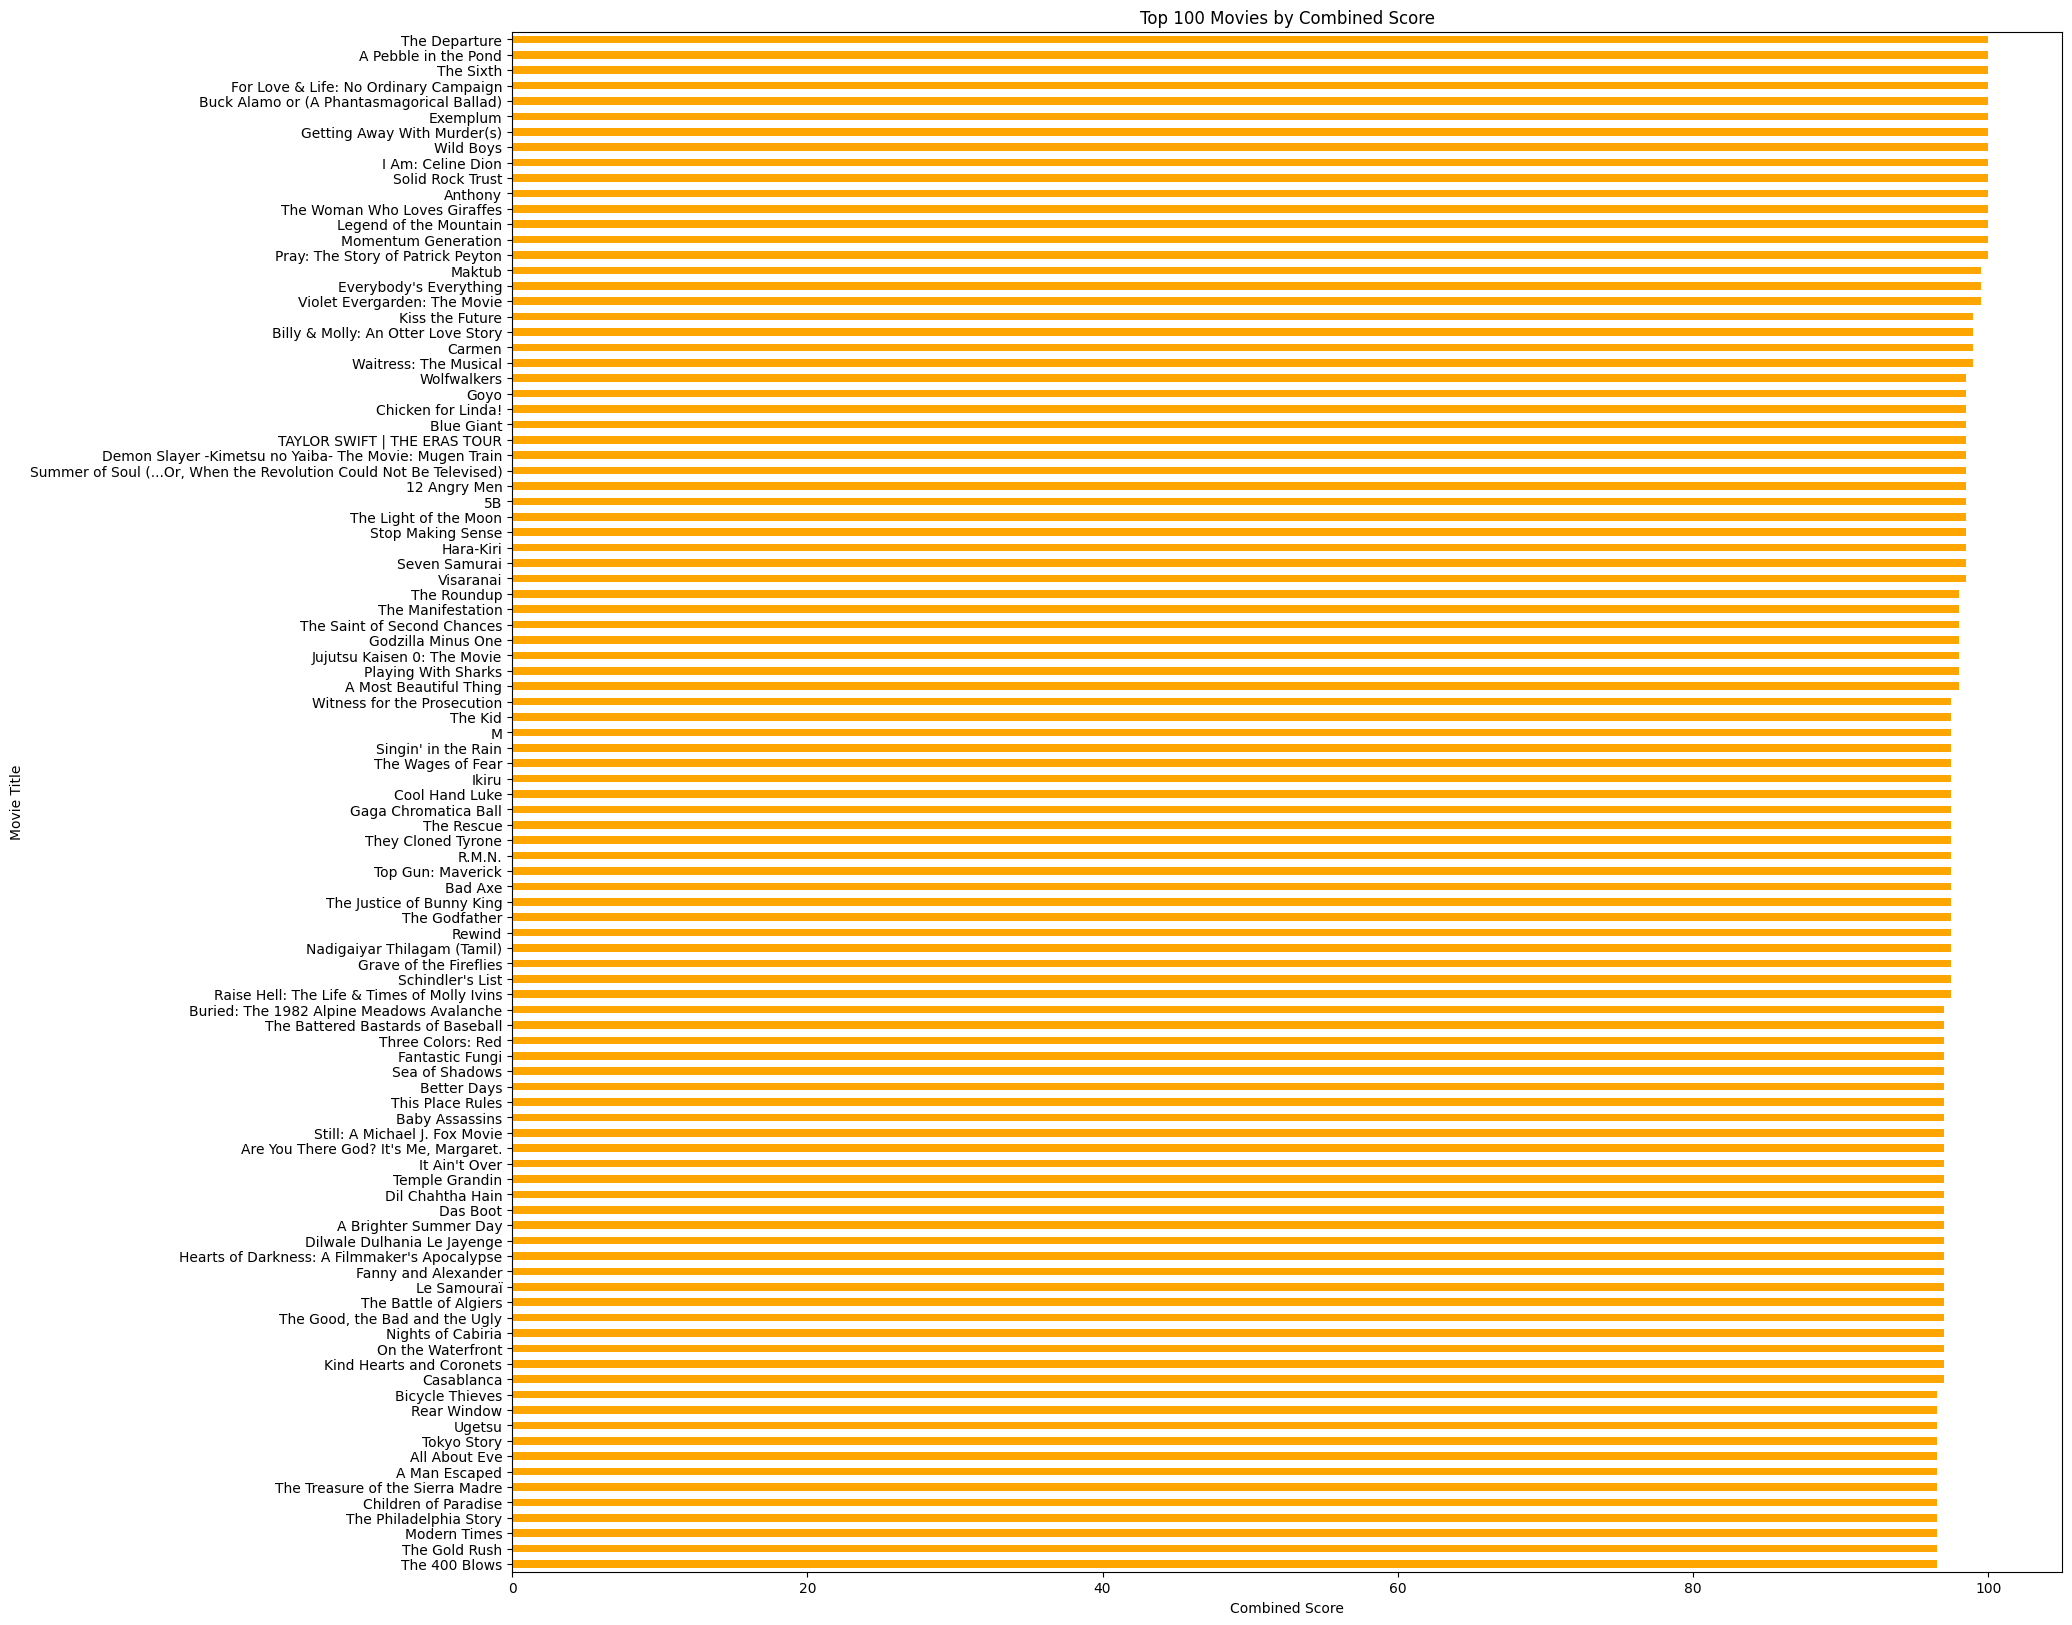

In [41]:
# Bar chart for Top 100 Movies by Combined Score
plt.figure(figsize=(20, 20))
top_100_combined.set_index('movie_title')['combined_score'].sort_values().plot(kind='barh', color='orange')
plt.title('Top 100 Movies by Combined Score')
plt.xlabel('Combined Score')
plt.ylabel('Movie Title')
plt.show()

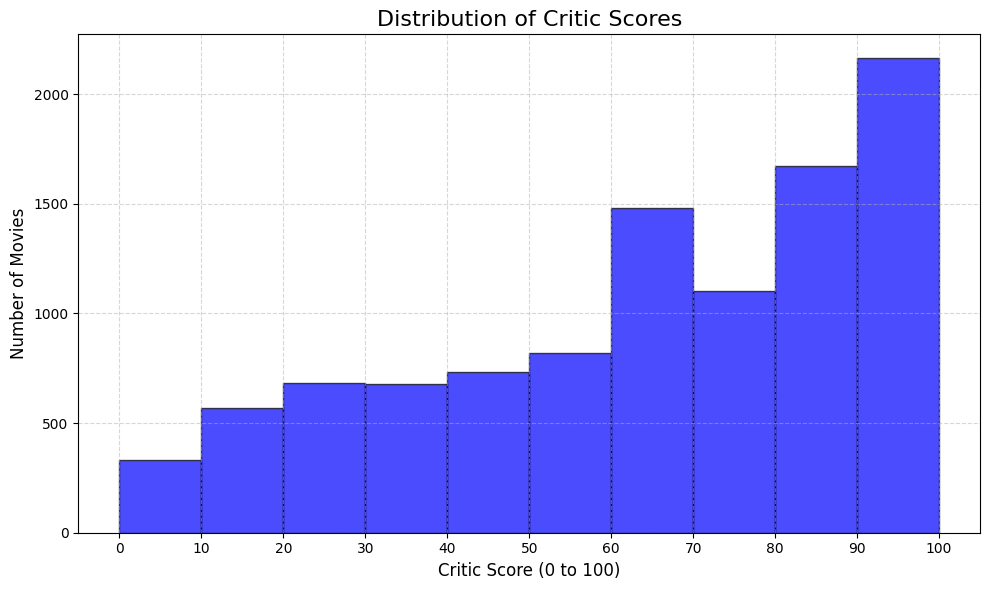

In [42]:
# Distribution of Critic Scores
plt.figure(figsize=(10, 6))
plt.hist(movies_cleaned['critic_score'], bins=10, color='blue', alpha=0.7, edgecolor='black')
plt.title('Distribution of Critic Scores', fontsize=16)
plt.xlabel('Critic Score (0 to 100)', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(range(0, 110, 10))  # Ensure x-axis ticks at every 10th score
plt.tight_layout()
plt.show()

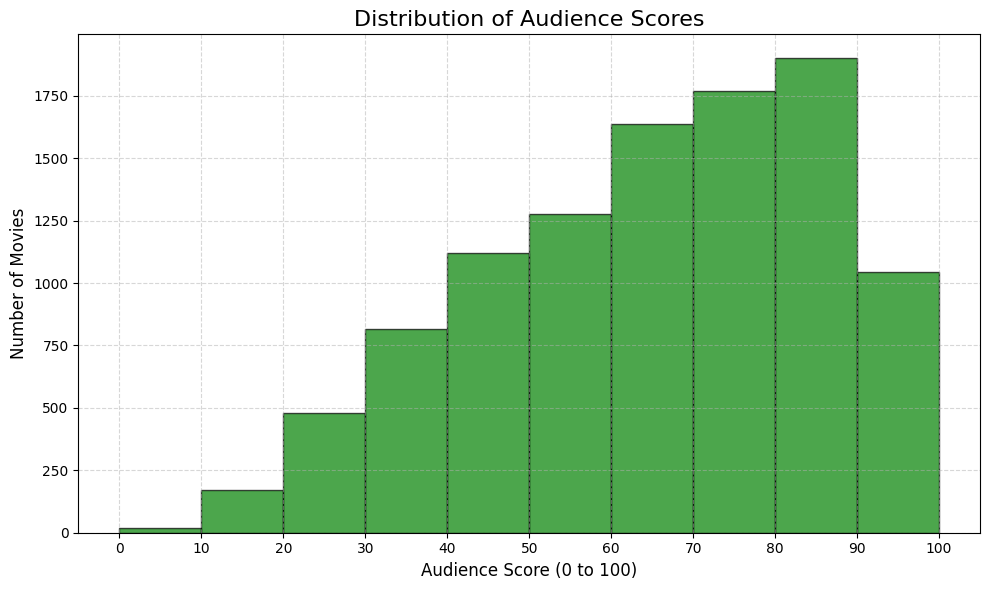

In [43]:
# Distribution of Audience Scores
plt.figure(figsize=(10, 6))
plt.hist(movies_cleaned['audience_score'], bins=10, color='green', alpha=0.7, edgecolor='black')
plt.title('Distribution of Audience Scores', fontsize=16)
plt.xlabel('Audience Score (0 to 100)', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(range(0, 110, 10))  # Ensure x-axis ticks at every 10th score
plt.tight_layout()
plt.show()


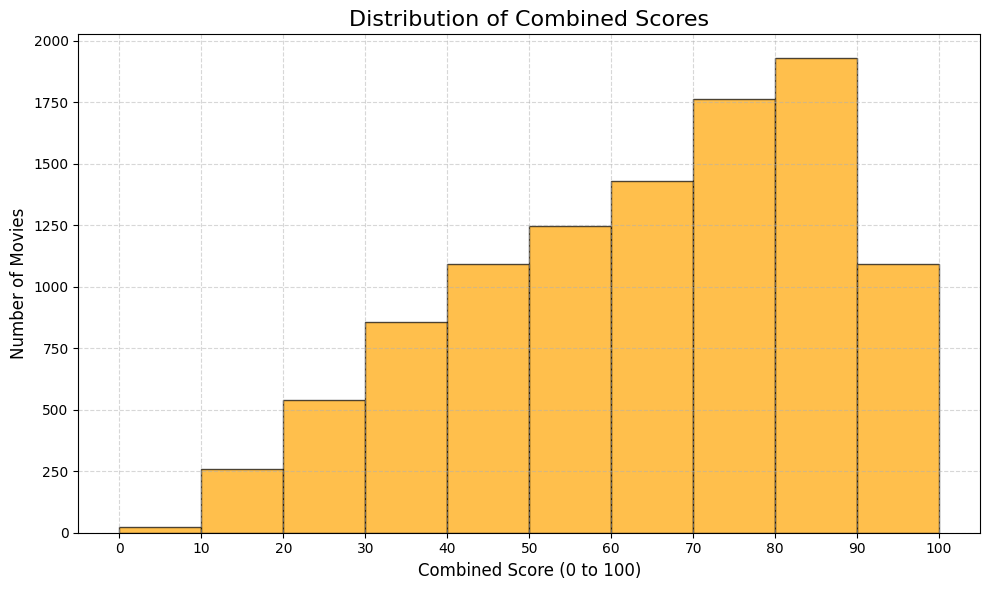

In [44]:
#  Distribution of Combined Scores
plt.figure(figsize=(10, 6))
plt.hist(movies_cleaned['combined_score'], bins=10, color='orange', alpha=0.7, edgecolor='black')
plt.title('Distribution of Combined Scores', fontsize=16)
plt.xlabel('Combined Score (0 to 100)', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(range(0, 110, 10))  # Ensure x-axis ticks at every 10th score
plt.tight_layout()
plt.show()

### Movies analysis

## `user_reviews`

#### Data Dictionary for `user_reviews`

| Column Name       | Data Type | Description                                                                                                 |
| ----------------- | --------- | ----------------------------------------------------------------------------------------------------------- |
| `movieId`         | object    | Unique identifier for each movie.                                                                           |
| `rating`          | float64   | The rating provided by the user for the movie.                                                              |
| `quote`           | object    | The text content of the user review (a short quote or description of their thoughts).                       |
| `reviewId`        | object    | Unique identifier for each user review (may be null or missing in some cases).                              |
| `isVerified`      | bool      | Indicates whether the review was written by a verified user.                                                |
| `isSuperReviewer` | bool      | Indicates whether the user is a "super reviewer" (a frequent or influential reviewer).                      |
| `hasSpoilers`     | bool      | Indicates whether the review contains spoilers.                                                             |
| `hasProfanity`    | bool      | Indicates whether the review contains profanity.                                                            |
| `score`           | float64   | The numeric score (possibly the same as the rating) given by the user.                                      |
| `creationDate`    | object    | The date when the user review was created.                                                                  |
| `userDisplayName` | object    | The display name of the user (may be missing or null in some cases).                                        |
| `userRealm`       | object    | A field indicating the platform or realm of the user (e.g., "RT" for Rotten Tomatoes).                      |
| `userId`          | object    | Unique identifier for the user who wrote the review.                                                        |

In [45]:
sampled_user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   movieId          1000000 non-null  object 
 1   rating           1000000 non-null  float64
 2   quote            1000000 non-null  object 
 3   reviewId         2884 non-null     object 
 4   isVerified       1000000 non-null  bool   
 5   isSuperReviewer  1000000 non-null  bool   
 6   hasSpoilers      1000000 non-null  bool   
 7   hasProfanity     1000000 non-null  bool   
 8   score            1000000 non-null  float64
 9   creationDate     1000000 non-null  object 
 10  userDisplayName  1550 non-null     object 
 11  userRealm        1000000 non-null  object 
 12  userId           1000000 non-null  object 
dtypes: bool(4), float64(2), object(7)
memory usage: 72.5+ MB


In [46]:
sampled_user_reviews.head()

,movieId,rating,quote,reviewId,isVerified,isSuperReviewer,hasSpoilers,hasProfanity,score,creationDate,userDisplayName,userRealm,userId
0,044acdfc-f685-338b-b465-d5405e5298c0,5.0,Tarantino`s great crime epic. Everyone in the ...,NaN,False,False,False,False,5.0,2005-10-15,NaN,RT,900809275
1,a67d1d59-e02f-35e0-9c53-b82e80799111,1.0,Unenjoyable for anyone over the age of RETARDED.,NaN,False,False,False,False,1.0,2005-11-22,NaN,RT,900699279
2,85a99b8b-4724-38b6-a5d0-23c0161a3ce5,3.5,Other people go outside and smoke when they ta...,NaN,False,False,False,False,3.5,2004-06-30,NaN,RT,900659533
3,e2bff218-467b-3595-ae11-c62d690641ad,5.0,"If you have seen this movie, then no words nee...",NaN,False,False,False,False,5.0,2005-10-22,NaN,RT,900767626
4,e17a5735-c633-3e81-91a2-dd5b500931f7,5.0,YAY YAH I COULD WATCH THIS WITH MARK LOL\r\n,NaN,False,False,False,False,5.0,2005-12-22,NaN,RT,1249927


In [47]:
# Check basic info about the dataset
print("Dataset Info:")
print(sampled_user_reviews.info())

# Check for missing values in each column
print("\nMissing values for each column:")
print(sampled_user_reviews.isna().sum())

# Check value counts for each column
for column in sampled_user_reviews.columns:
    print(f"\nValue counts for column: {column}")
    print(sampled_user_reviews[column].value_counts())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   movieId          1000000 non-null  object 
 1   rating           1000000 non-null  float64
 2   quote            1000000 non-null  object 
 3   reviewId         2884 non-null     object 
 4   isVerified       1000000 non-null  bool   
 5   isSuperReviewer  1000000 non-null  bool   
 6   hasSpoilers      1000000 non-null  bool   
 7   hasProfanity     1000000 non-null  bool   
 8   score            1000000 non-null  float64
 9   creationDate     1000000 non-null  object 
 10  userDisplayName  1550 non-null     object 
 11  userRealm        1000000 non-null  object 
 12  userId           1000000 non-null  object 
dtypes: bool(4), float64(2), object(7)
memory usage: 72.5+ MB
None

Missing values for each column:
movieId                 0
rating                  0
qu

In [48]:
# Drop unnecessary columns
sampled_user_reviews_cleaned = sampled_user_reviews
sampled_user_reviews_cleaned = sampled_user_reviews_cleaned.drop(['reviewId', 'userDisplayName', 'isVerified', 'hasSpoilers', 'userRealm', 'hasProfanity', 'isSuperReviewer', 'rating'], axis=1)

print(sampled_user_reviews_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   movieId       1000000 non-null  object 
 1   quote         1000000 non-null  object 
 2   score         1000000 non-null  float64
 3   creationDate  1000000 non-null  object 
 4   userId        1000000 non-null  object 
dtypes: float64(1), object(4)
memory usage: 38.1+ MB
None


In [49]:
sampled_user_reviews_cleaned.columns = [camel_to_snake_manual(col) for col in sampled_user_reviews_cleaned.columns]
sampled_user_reviews_cleaned.columns

Index(['movie_id', 'quote', 'score', 'creation_date', 'user_id'], dtype='object')

In [50]:
# Round the 'score' column to the nearest integer
sampled_user_reviews_cleaned['standardized_score'] = sampled_user_reviews_cleaned['score'].round(0).astype(int)
sampled_user_reviews_cleaned = sampled_user_reviews_cleaned.drop('score', axis=1)
print(sampled_user_reviews_cleaned.columns)

Index(['movie_id', 'quote', 'creation_date', 'user_id', 'standardized_score'], dtype='object')


In [51]:
sampled_user_reviews_cleaned.columns

Index(['movie_id', 'quote', 'creation_date', 'user_id', 'standardized_score'], dtype='object')

In [52]:
# Convert 'creation_date' to datetime format
sampled_user_reviews_cleaned['creation_date'] = pd.to_datetime(sampled_user_reviews_cleaned['creation_date'], errors='coerce')

# Extract the year from 'creation_date'
sampled_user_reviews_cleaned['creation_year'] = sampled_user_reviews_cleaned['creation_date'].dt.year

# Drop the 'creation_date' column
sampled_user_reviews_cleaned.drop(columns=['creation_date'], inplace=True)

print(sampled_user_reviews_cleaned.head())

                               movie_id  \
0  044acdfc-f685-338b-b465-d5405e5298c0   
1  a67d1d59-e02f-35e0-9c53-b82e80799111   
2  85a99b8b-4724-38b6-a5d0-23c0161a3ce5   
3  e2bff218-467b-3595-ae11-c62d690641ad   
4  e17a5735-c633-3e81-91a2-dd5b500931f7   

                                               quote    user_id  \
0  Tarantino`s great crime epic. Everyone in the ...  900809275   
1   Unenjoyable for anyone over the age of RETARDED.  900699279   
2  Other people go outside and smoke when they ta...  900659533   
3  If you have seen this movie, then no words nee...  900767626   
4       YAY YAH I COULD WATCH THIS WITH MARK LOL\r\n    1249927   

   standardized_score  creation_year  
0                   5           2005  
1                   1           2005  
2                   4           2004  
3                   5           2005  
4                   5           2005  


In [53]:
sampled_user_reviews_cleaned['creation_year'].value_counts()

,count
creation_year,
2006,901191
2005,60473
2004,34893
2003,3362
2002,49
1996,10
1999,8
2000,5
2001,5


In [54]:
sampled_user_reviews_cleaned['user_id'].describe()

,user_id
count,1000000
unique,139327
top,900705768
freq,1232


In [55]:
sampled_user_reviews_cleaned.head()

,movie_id,quote,user_id,standardized_score,creation_year
0,044acdfc-f685-338b-b465-d5405e5298c0,Tarantino`s great crime epic. Everyone in the ...,900809275,5,2005
1,a67d1d59-e02f-35e0-9c53-b82e80799111,Unenjoyable for anyone over the age of RETARDED.,900699279,1,2005
2,85a99b8b-4724-38b6-a5d0-23c0161a3ce5,Other people go outside and smoke when they ta...,900659533,4,2004
3,e2bff218-467b-3595-ae11-c62d690641ad,"If you have seen this movie, then no words nee...",900767626,5,2005
4,e17a5735-c633-3e81-91a2-dd5b500931f7,YAY YAH I COULD WATCH THIS WITH MARK LOL\r\n,1249927,5,2005


In [56]:
# Save a cleaned version of sampled_user_reviews_cleaned
critic_reviews_cleaned.to_csv('/content/drive/MyDrive/chingu/chingu_datasets/sampled_user_reviews_cleaned.csv', index=False)

### User Reviews Analysis